In [1]:
import os
print(os.getcwd())

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN


D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_00_hidd_l1_032_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_01_hidd_l1_032_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_02_hidd_l1_032_hidd_l2_032


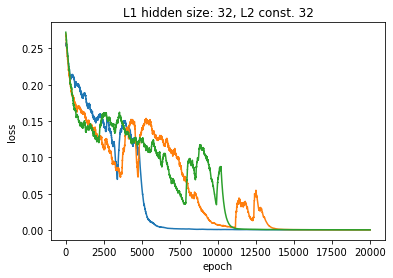

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_03_hidd_l1_048_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_04_hidd_l1_048_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_05_hidd_l1_048_hidd_l2_032


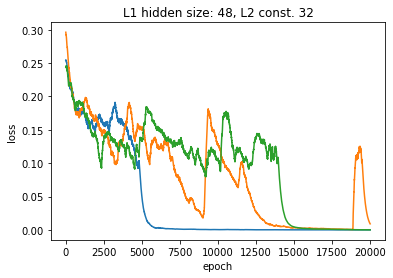

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_06_hidd_l1_064_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_07_hidd_l1_064_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_08_hidd_l1_064_hidd_l2_032


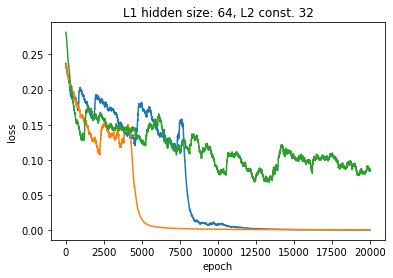

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_09_hidd_l1_080_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_10_hidd_l1_080_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_11_hidd_l1_080_hidd_l2_032


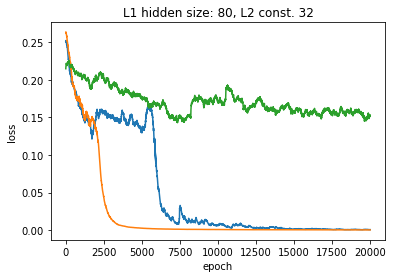

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_12_hidd_l1_096_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_13_hidd_l1_096_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_14_hidd_l1_096_hidd_l2_032


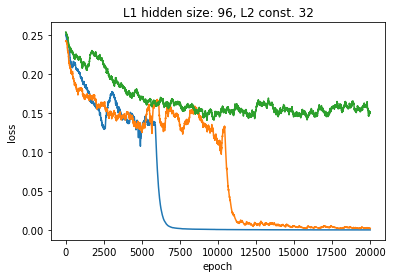

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_15_hidd_l1_112_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_16_hidd_l1_112_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_17_hidd_l1_112_hidd_l2_032


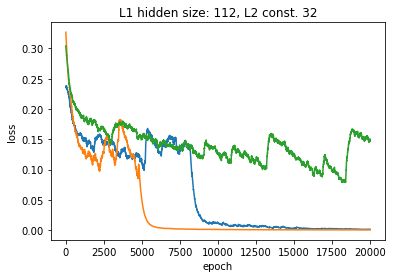

D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_18_hidd_l1_128_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_19_hidd_l1_128_hidd_l2_032
D:\AGH\Projects\ANN\CNN_autoencoder\project\CNN_autoencoder\Net_simple_RNN\runs\L1_l2\idx_20_hidd_l1_128_hidd_l2_032


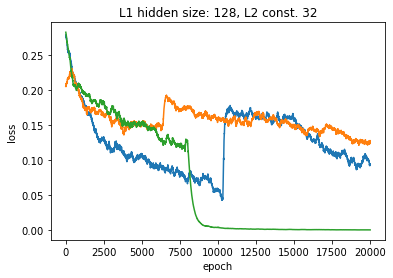

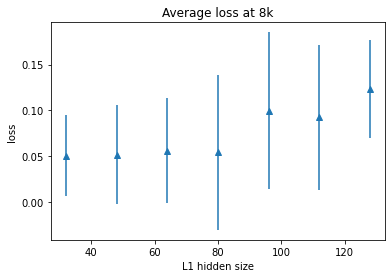

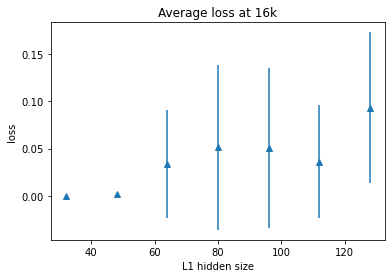

In [128]:
from pathlib import Path
import os
import csv
import matplotlib.pyplot as plt
import re
import statistics
import numpy as np

def smooth(data, weight):  # Weight between 0 and 1
    last = data[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

def read_loss_train_files(results_dir, folders_names):
    all_files_losses = np.empty((0,10000), float)
    for idx, folder_name in enumerate(folders_names):
        folder_path = results_dir / folder_name
        file_path = folder_path / 'csv' / 'Loss_train.csv'
        print(str(folder_path))

        with open(file_path, newline='') as file:
            reader = csv.reader(file, delimiter = ',')
            headings = next(reader)
            single_file_losses = np.array([])
            for i, row in enumerate(reader):
                single_file_losses = np.append(single_file_losses, float(row[1]))
        all_files_losses = np.vstack([all_files_losses, single_file_losses])
    all_files_losses = np.array(all_files_losses)

    return all_files_losses

hidden_sizes = [32, 48, 64, 80, 96, 112, 128]
x_axis = range(0,20000,2)
loss_history_avg_8k = []
loss_history_avg_16k = []
loss_history_stdev_8k = []
loss_history_stdev_16k = []

for idx, hidden_size in enumerate(hidden_sizes):
    results_dir = Path(os.getcwd()) / 'runs' / 'L1_l2'
    all_results_folders = os.listdir(str(results_dir))
    r = re.compile(".*hidd_l1_{:03d}_hidd_l2_032".format(hidden_size))
    selected_folders = list(filter(r.match, all_results_folders))

    selected_files_losses = read_loss_train_files(results_dir, selected_folders)
    weight = 0.99

    smoothed_data = np.empty((0,10000), float)
    for idx, data in enumerate(selected_files_losses):
        smoothed = smooth(data, weight)
        smoothed_data = np.vstack([smoothed_data, smoothed])

    losses_at_8k = smoothed_data[:,4000]
    losses_at_16k = smoothed_data[:,8000]

    avg_loss_8k = statistics.mean(losses_at_8k)
    loss_history_avg_8k.append(avg_loss_8k)
    stdev_loss_8k = statistics.stdev(losses_at_8k)
    loss_history_stdev_8k.append(stdev_loss_8k)
    avg_loss_16k = statistics.mean(losses_at_16k)
    loss_history_avg_16k.append(avg_loss_16k)
    stdev_loss_16k = statistics.stdev(losses_at_16k)
    loss_history_stdev_16k.append(stdev_loss_16k)

    for idx, data in enumerate(smoothed_data):
        plt.plot(x_axis, data)
        plt.title('L1 hidden size: {}, L2 const. 32'.format(hidden_size))
        plt.ylabel('loss')
        plt.xlabel('epoch')
    plt.savefig('L1_hidden_size_{:03d}_L2_32'.format(hidden_size))
    plt.show()

plt.errorbar(hidden_sizes, loss_history_avg_8k, loss_history_stdev_8k, linestyle='None', marker='^')
plt.title('Average loss at 8k')
plt.xlabel('L1 hidden size')
plt.ylabel('loss')
plt.savefig('avg_loss_8k')
plt.show()

plt.errorbar(hidden_sizes, loss_history_avg_16k, loss_history_stdev_16k, linestyle='None', marker='^')
plt.title('Average loss at 16k')
plt.xlabel('L1 hidden size')
plt.ylabel('loss')
plt.savefig('avg_loss_16k')
plt.show()



In [ ]:
print('test')


In [4]:
hidden_sizes = [16]
num_layers = 1

for i, hidden_size in enumerate(hidden_sizes):
    print(i)
    print(hidden_size)

0
16


In [ ]:
import random
import numpy

def decimal_to_gray_decimal(n):
    return n ^ (n >> 1)

def gray_to_binary(n):
    n = int(n, 2) # convert to int
    mask = n
    while mask != 0:
        mask >>= 1
        n ^= mask # n=n^mask
    return format(n, pixel_depth_format)


pixel_depth = 8
pixel_depth_format = '0{}b'.format(pixel_depth)
lower_bound = 0
upper_bound = pow(2,pixel_depth)-1

print('max input: {}'.format(upper_bound))
input_as_decimal = random.randint(lower_bound,upper_bound)
print('random input: {}'.format(input_as_decimal))
input_as_gray_decimal = decimal_to_gray_decimal(input_as_decimal)
print('decimal input to gray code decimal: {}'.format(input_as_gray_decimal))
input_as_gray_code = format(input_as_gray_decimal, pixel_depth_format)
print('decimal input to gray code: {}'.format(input_as_gray_code))
input_as_binary = gray_to_binary(input_as_gray_code)
print('input converted to binary:', input_as_binary)
print('type: {}'.format(type(input_as_binary)))
x = numpy.frombuffer()(input_as_binary, dtype=numpy.int)
print('type: {}'.format(type(x)))
print(x)

In [34]:
import numpy
a = '1100'
b = numpy.array(a)
print(b)

1100


In [41]:
import numpy as np
pixel_depth = 4
pixel_depth_format = '0{}b'.format(pixel_depth)

def decimal_to_gray_decimal(n):
    return n ^ (n >> 1)

def gray_to_binary(n):
    n = int(n, 2) # convert to int
    mask = n
    while mask != 0:
        mask >>= 1
        n ^= mask # n=n^mask
    return format(n, pixel_depth_format)

def getSample(pixel_depth, test_flag):
    lower_bound = 0
    upper_bound = pow(2, pixel_depth) - 1

    input_as_decimal = random.randint(lower_bound, upper_bound)
    input_as_gray_decimal = decimal_to_gray_decimal(input_as_decimal)
    input_as_gray_code = format(input_as_gray_decimal, pixel_depth_format)
    input_as_binary = gray_to_binary(input_as_gray_code)
    input_as_gray_code = np.array(list(input_as_gray_code[::-1]), dtype=int)
    input_as_binary = np.array(list(input_as_binary[::-1]), dtype=int)

    if test_flag == 1:
        print('Sample as gray: {}, sample as binary: {}'.fomart(input_as_gray_code, input_as_binary))

    return input_as_gray_code, input_as_binary

x, y = getSample(pixel_depth, test_flag=0)
print(x,y)
print(type(x))

[1 0 0 0] [1 0 0 0]
<class 'numpy.ndarray'>


In [4]:
import numpy as np

x = np.array([[1,0,1,0],[0,1,0,1],
              [1,0,1,1],[0,1,1,0],[1,1,0,0]])
print(x)

[[1 0 1 0]
 [0 1 0 1]
 [1 0 1 1]
 [0 1 1 0]
 [1 1 0 0]]
